# Cuadernillo de la felicidad a nivel mundial
## Este cuaderno esta realizado en jupyter notebook el 15 de enero del 2024 y la información que hemos obtenido esta unicamente abarcada desde el 2015 hasta el 2019
### El cuaderno esta realizado por José de Jesús Hernández Vázquez
#### Los conjuntos de datos estan todos en kaggle.com con el siguiente link: https://www.kaggle.com/datasets/unsdsn/world-happiness/data

#### Para este cuadernillo vamos a seguir los siguientes pasos
1. Análisis de datos exploratorios 
2. Anális de eries temporales
3. Los mejores y peores puntajes
4. Análisis de correlación
5. Predicción de puntajes futuros

### Vamos a hacer las importaciones necesarias para poder realizar este proyecto

In [53]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os

### Empecemos por ver los datos del 2015

In [52]:
df_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')

df_2015.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/world-happiness/2015.csv'

### Continuamos con los datos del 2016

In [6]:
df_2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### Continuamos con los datos del 2017

In [7]:
df_2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')

df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Continuamos con los datos del 2018

In [8]:
df_2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


### Conitnuamos con los datos del 2019

In [9]:
df_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Vamos a iniciar por visualizar los datos del 2015 

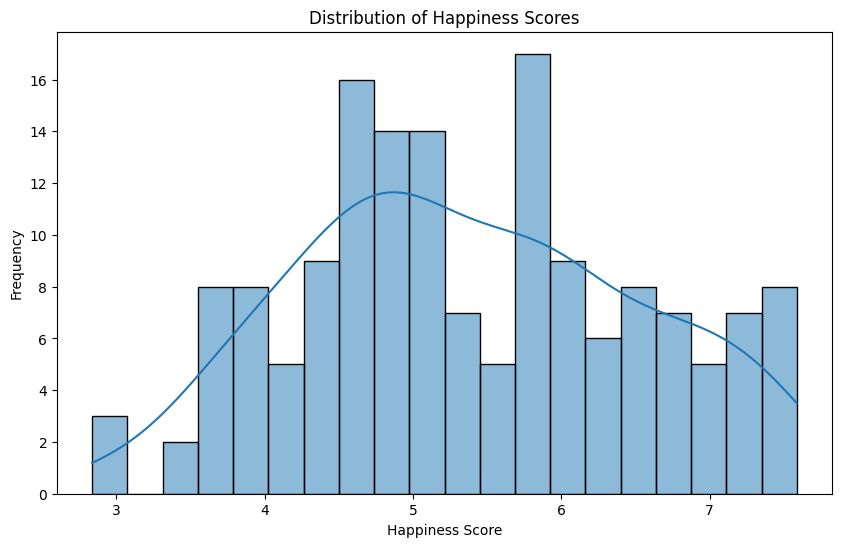

In [10]:
# Plot a histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2015['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


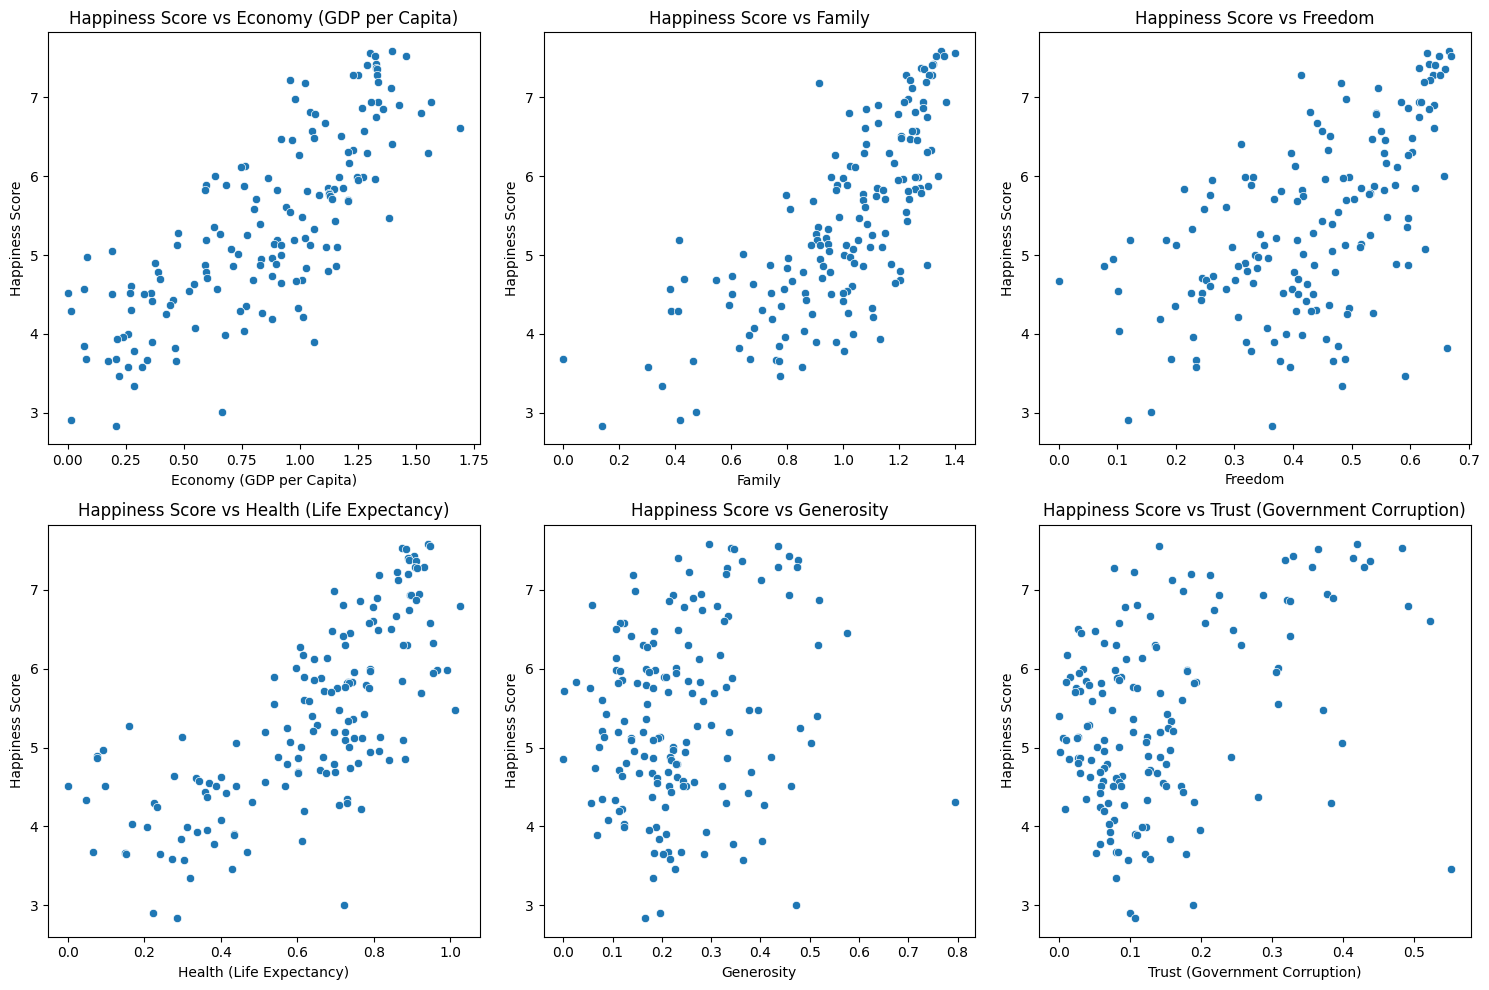

In [11]:
## Creamos una lista de los factores que se podrian relacionar entre si para futuro uso

factors = ['Economy (GDP per Capita)','Family','Freedom', 'Health (Life Expectancy)', 'Generosity','Trust (Government Corruption)']

## Ajustamos una figura y creamoos subtramas para cada factor contra el puntaje de felicidad

plt.figure(figsize=(15,10)) ## Establecemos el tamaño de la figura

for i,factor in enumerate(factors, 1):
    plt.subplot(2,3,i) ## Creamos un subplot en una figura de 2x3
    sns.scatterplot(x = factor, y = 'Happiness Score', data = df_2015) ## Graficando una grafica de puntos
    plt.title(f'Happiness Score vs {factor}') ## Ajustando el titulo

plt.tight_layout() ## Ajustamos el acomodo para evitar que se empalmen
plt.show() ## Mostramos la grafica

#### Apartir de los datos del 2015, nos damos cuenta que hay una alta relación entre el puntaje de felicidad con respecto a la economía, la familia, libertad y salud, sin embargo no hay una gran relación entre el puntaje de felicidad y la generosidad o la confianza con el gobierno

### Vamos a proceder a hacer el mismo análisis pero para los datos del 2016

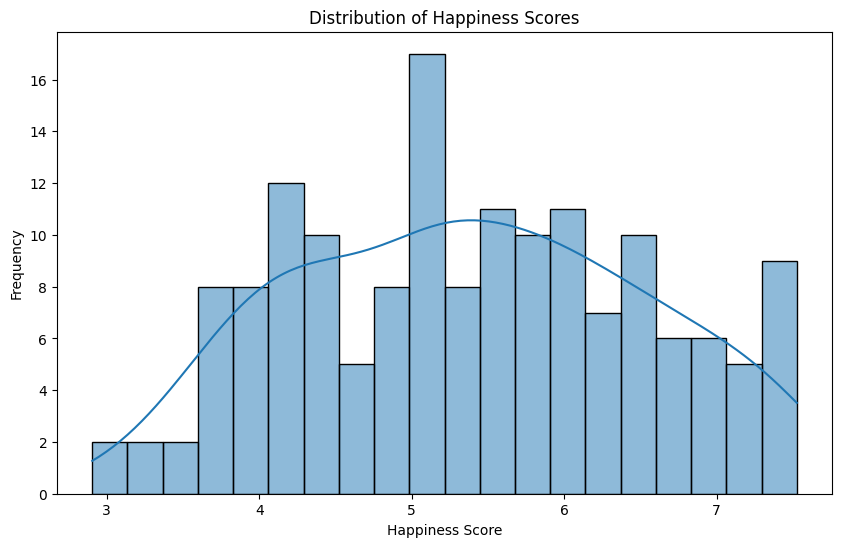

In [12]:
# Plot a histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2016['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


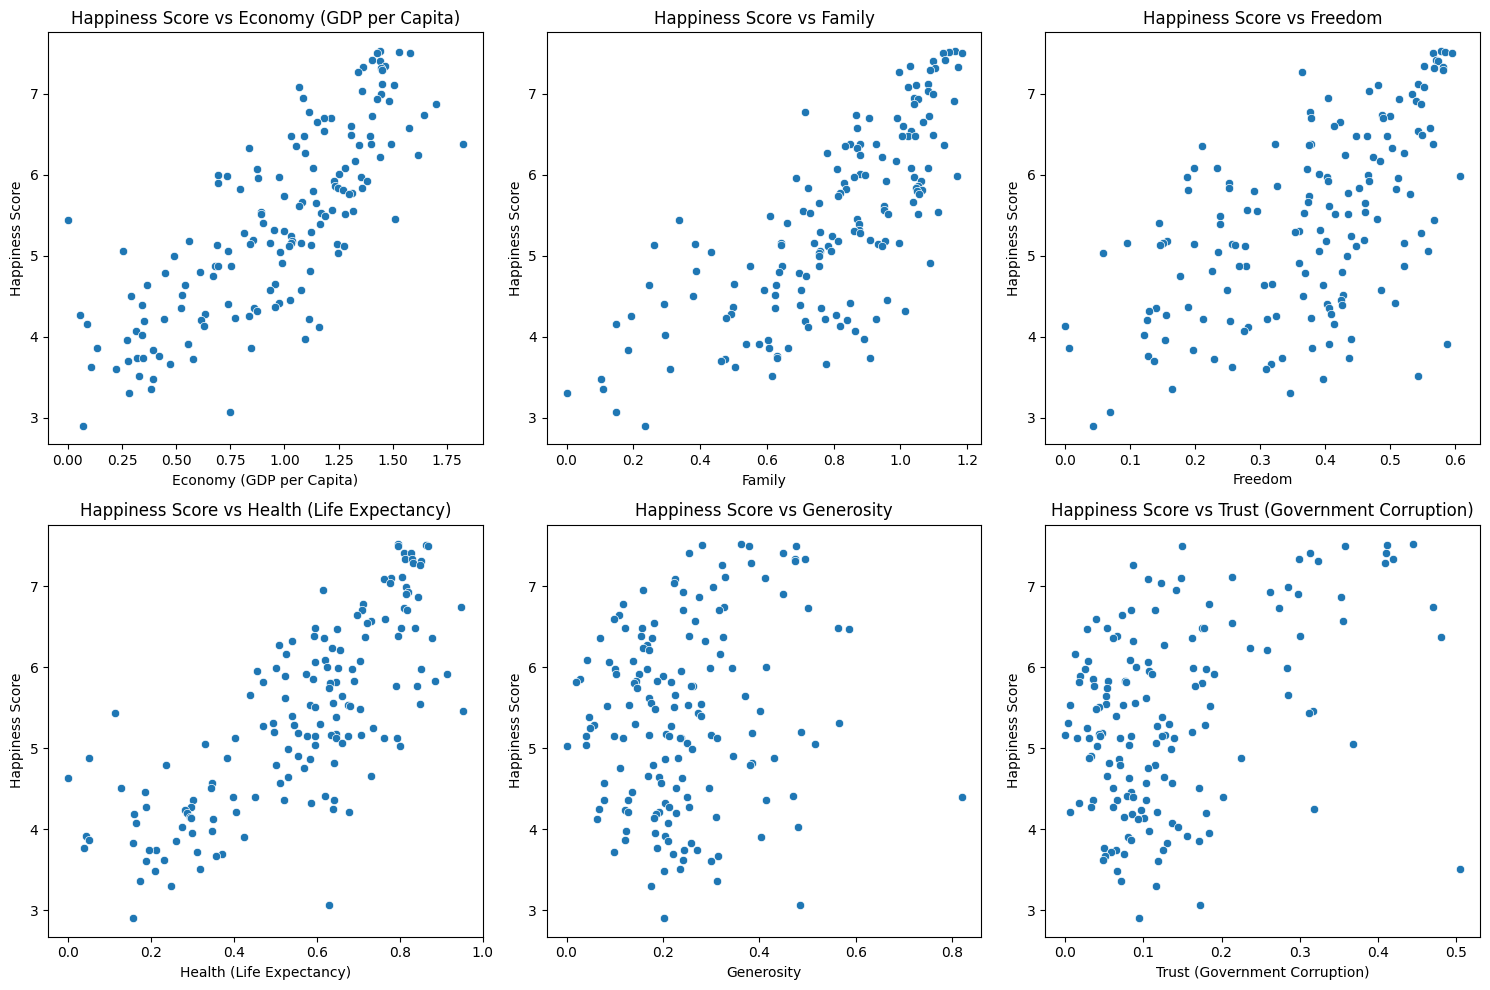

In [13]:
## Creamos una lista de los factores que se podrian relacionar entre si para futuro uso

factors = ['Economy (GDP per Capita)','Family','Freedom', 'Health (Life Expectancy)', 'Generosity','Trust (Government Corruption)']

## Ajustamos una figura y creamoos subtramas para cada factor contra el puntaje de felicidad

plt.figure(figsize=(15,10)) ## Establecemos el tamaño de la figura

for i,factor in enumerate(factors, 1):
    plt.subplot(2,3,i) ## Creamos un subplot en una figura de 2x3
    sns.scatterplot(x = factor, y = 'Happiness Score', data = df_2016) ## Graficando una grafica de puntos
    plt.title(f'Happiness Score vs {factor}') ## Ajustando el titulo

plt.tight_layout() ## Ajustamos el acomodo para evitar que se empalmen
plt.show() ## Mostramos la grafica

#### En este punto empezamos a notar que la relación entre los factores que se involucran para determinar el puntaje de felicidad tienen el mismo comportamiento tanto en el 2015 como en el 2016

### Continuaremos con el análisis de los datos del 2017

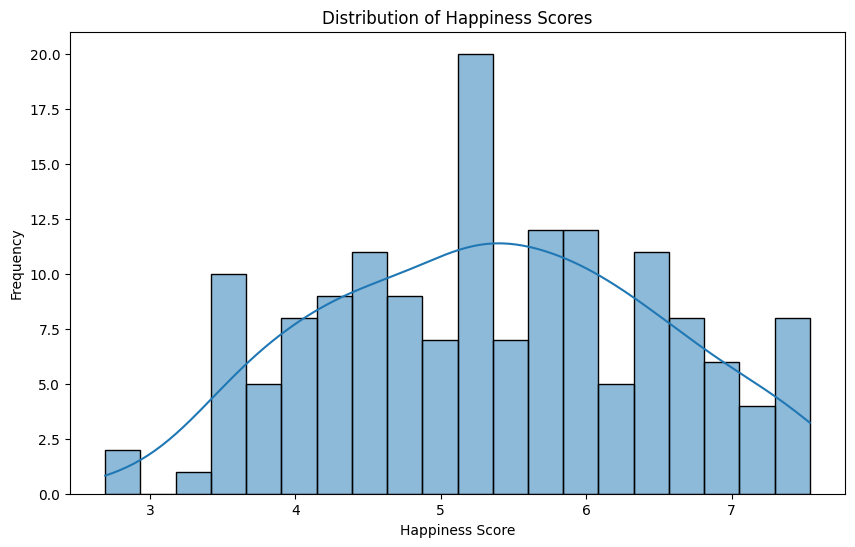

In [14]:
# Plot a histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2017['Happiness.Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

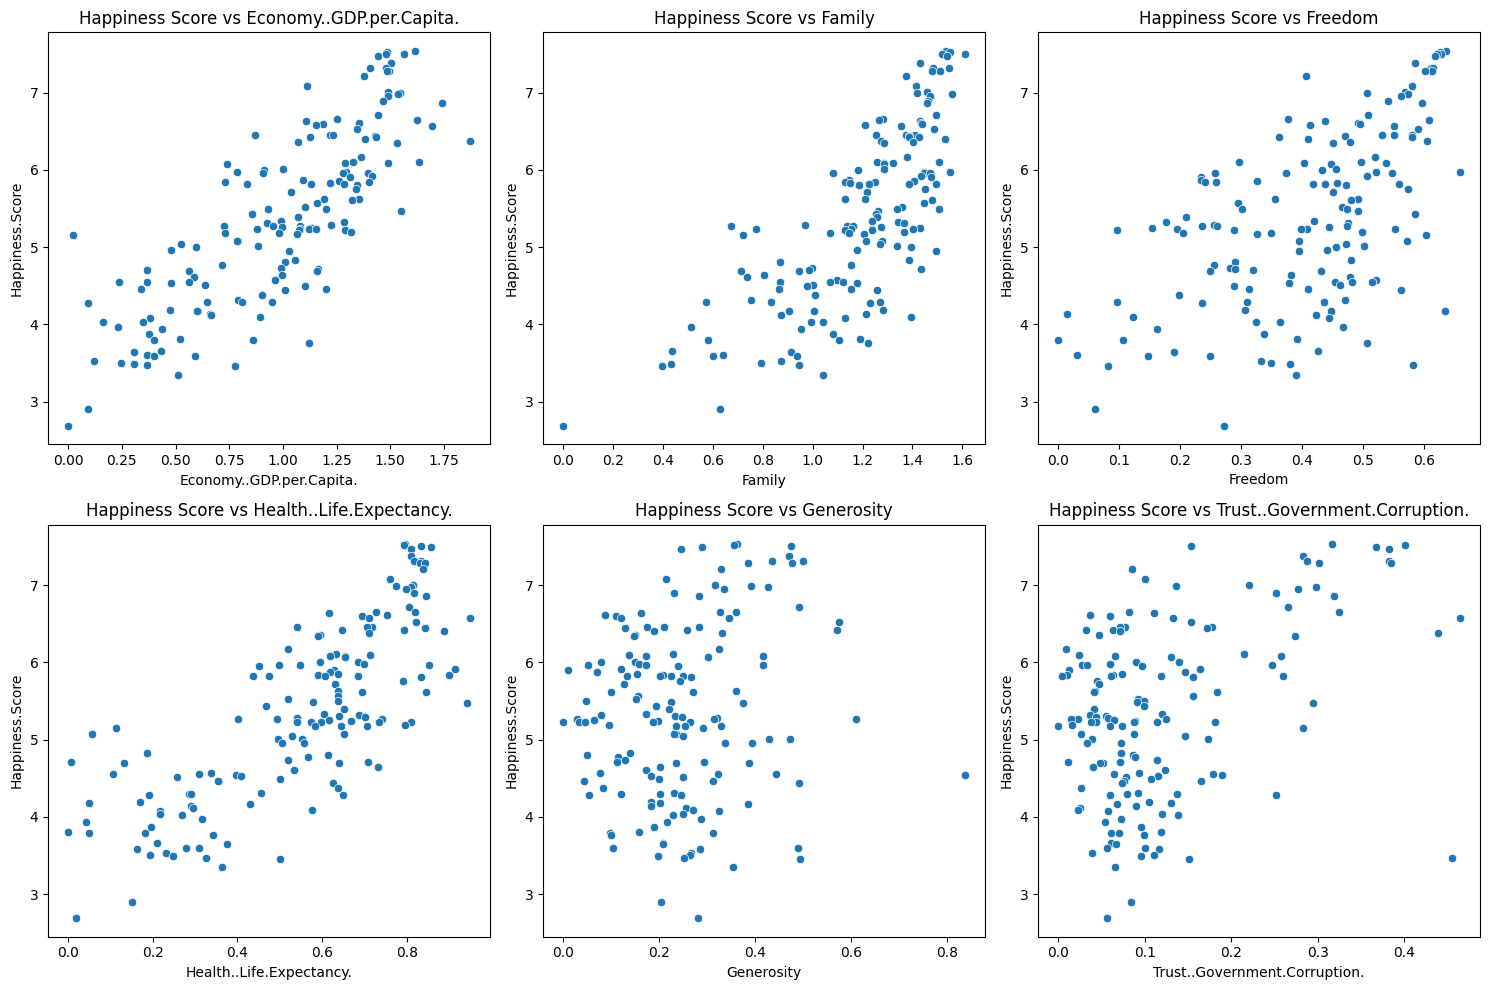

In [15]:
## Creamos una lista de los factores que se podrian relacionar entre si para futuro uso

factors = ['Economy..GDP.per.Capita.','Family','Freedom', 'Health..Life.Expectancy.', 'Generosity','Trust..Government.Corruption.']

## Ajustamos una figura y creamoos subtramas para cada factor contra el puntaje de felicidad

plt.figure(figsize=(15,10)) ## Establecemos el tamaño de la figura

for i,factor in enumerate(factors, 1):
    plt.subplot(2,3,i) ## Creamos un subplot en una figura de 2x3
    sns.scatterplot(x = factor, y = 'Happiness.Score', data = df_2017) ## Graficando una grafica de puntos
    plt.title(f'Happiness Score vs {factor}') ## Ajustando el titulo

plt.tight_layout() ## Ajustamos el acomodo para evitar que se empalmen
plt.show() ## Mostramos la grafica

#### Empezamos a notar nuevamente la relación entre los datos que determinan el comportamiento del puntaje de felicidad llevan la misma relación que en años previos

### Analizamos ahora los datos del 2018

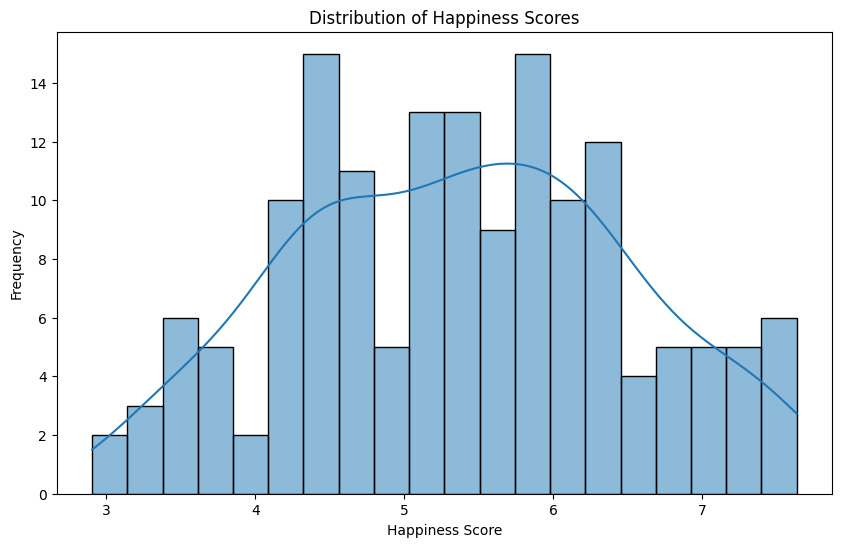

In [16]:
# Plot a histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2018['Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

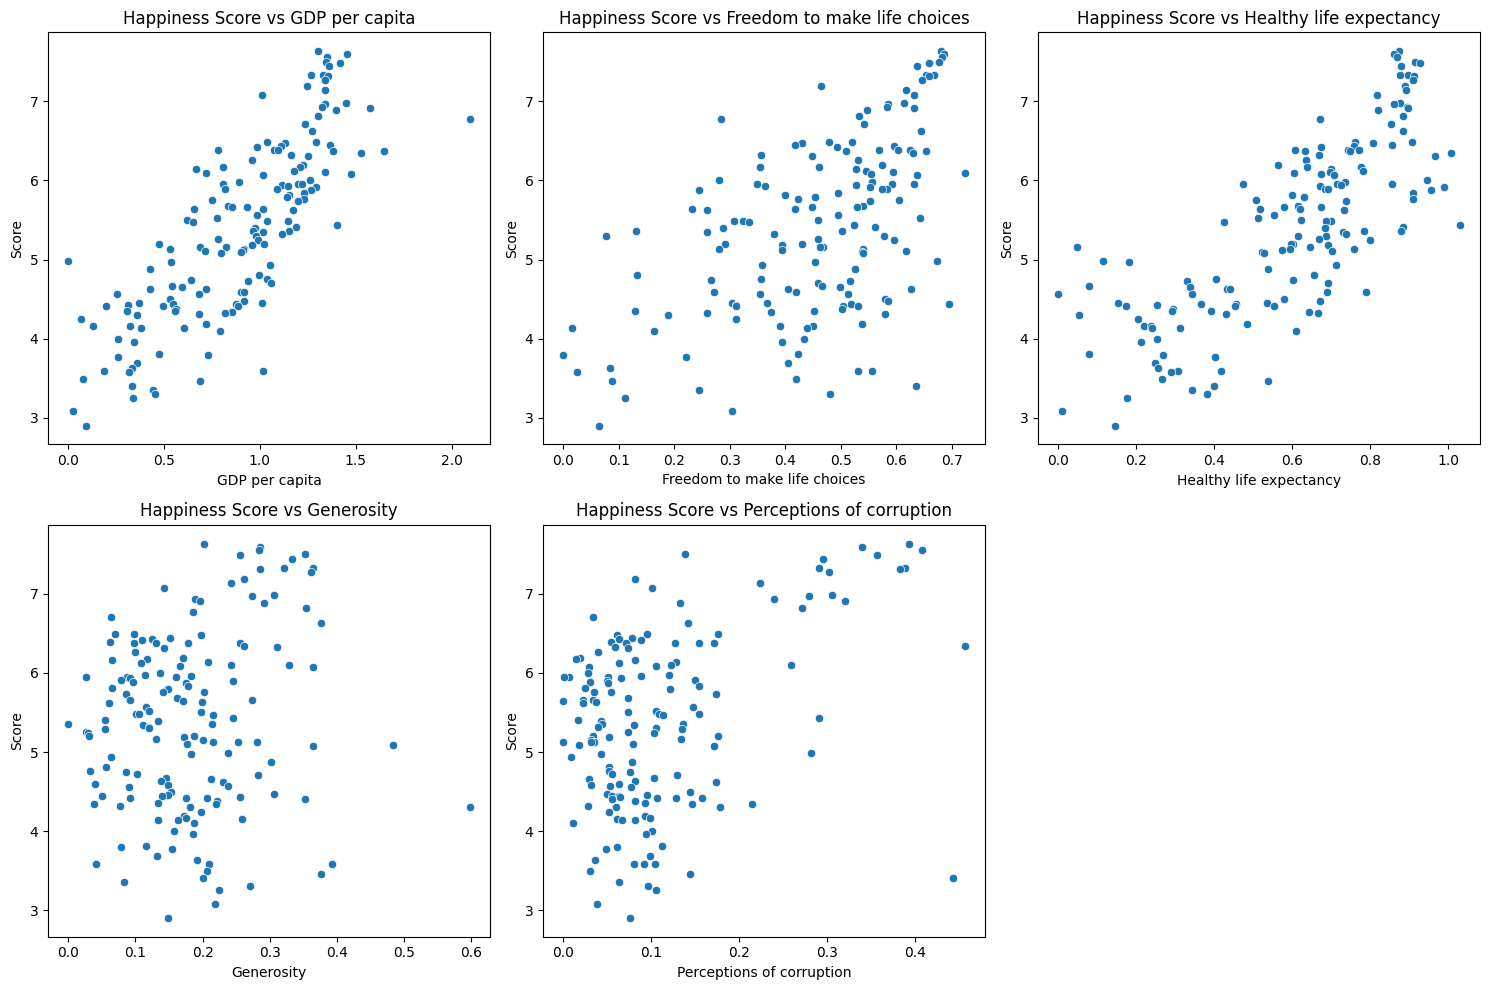

In [17]:
## Creamos una lista de los factores que se podrian relacionar entre si para futuro uso

factors = ['GDP per capita','Freedom to make life choices', 'Healthy life expectancy', 'Generosity','Perceptions of corruption']

## Ajustamos una figura y creamoos subtramas para cada factor contra el puntaje de felicidad

plt.figure(figsize=(15,10)) ## Establecemos el tamaño de la figura

for i,factor in enumerate(factors, 1):
    plt.subplot(2,3,i) ## Creamos un subplot en una figura de 2x3
    sns.scatterplot(x = factor, y = 'Score', data = df_2018) ## Graficando una grafica de puntos
    plt.title(f'Happiness Score vs {factor}') ## Ajustando el titulo

plt.tight_layout() ## Ajustamos el acomodo para evitar que se empalmen
plt.show() ## Mostramos la grafica

#### Aunque los datos no son totalmente el mismo nombre y nos falta el factor de familia en los datos el 2018, podemos verificar que la relación se mantiene aún en este año como en años previos

### Continuamos con los datos del 2019

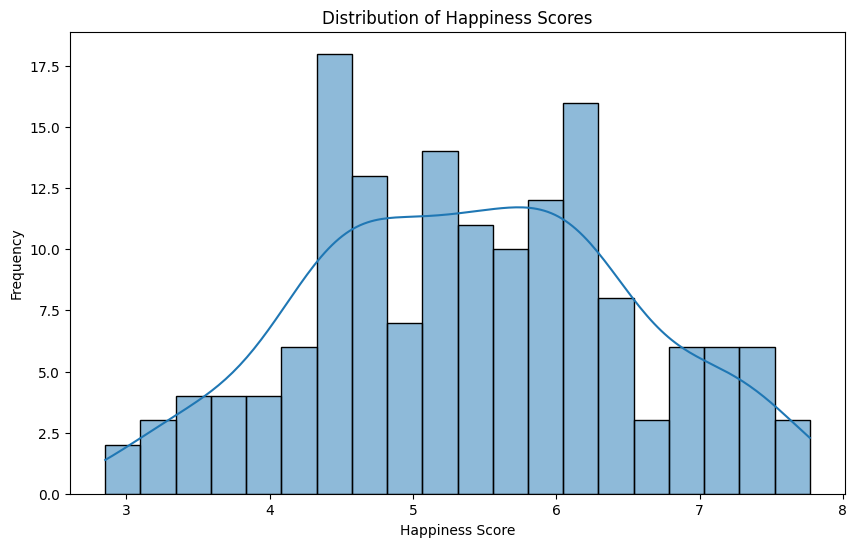

In [18]:
# Plot a histogram of happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2019['Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

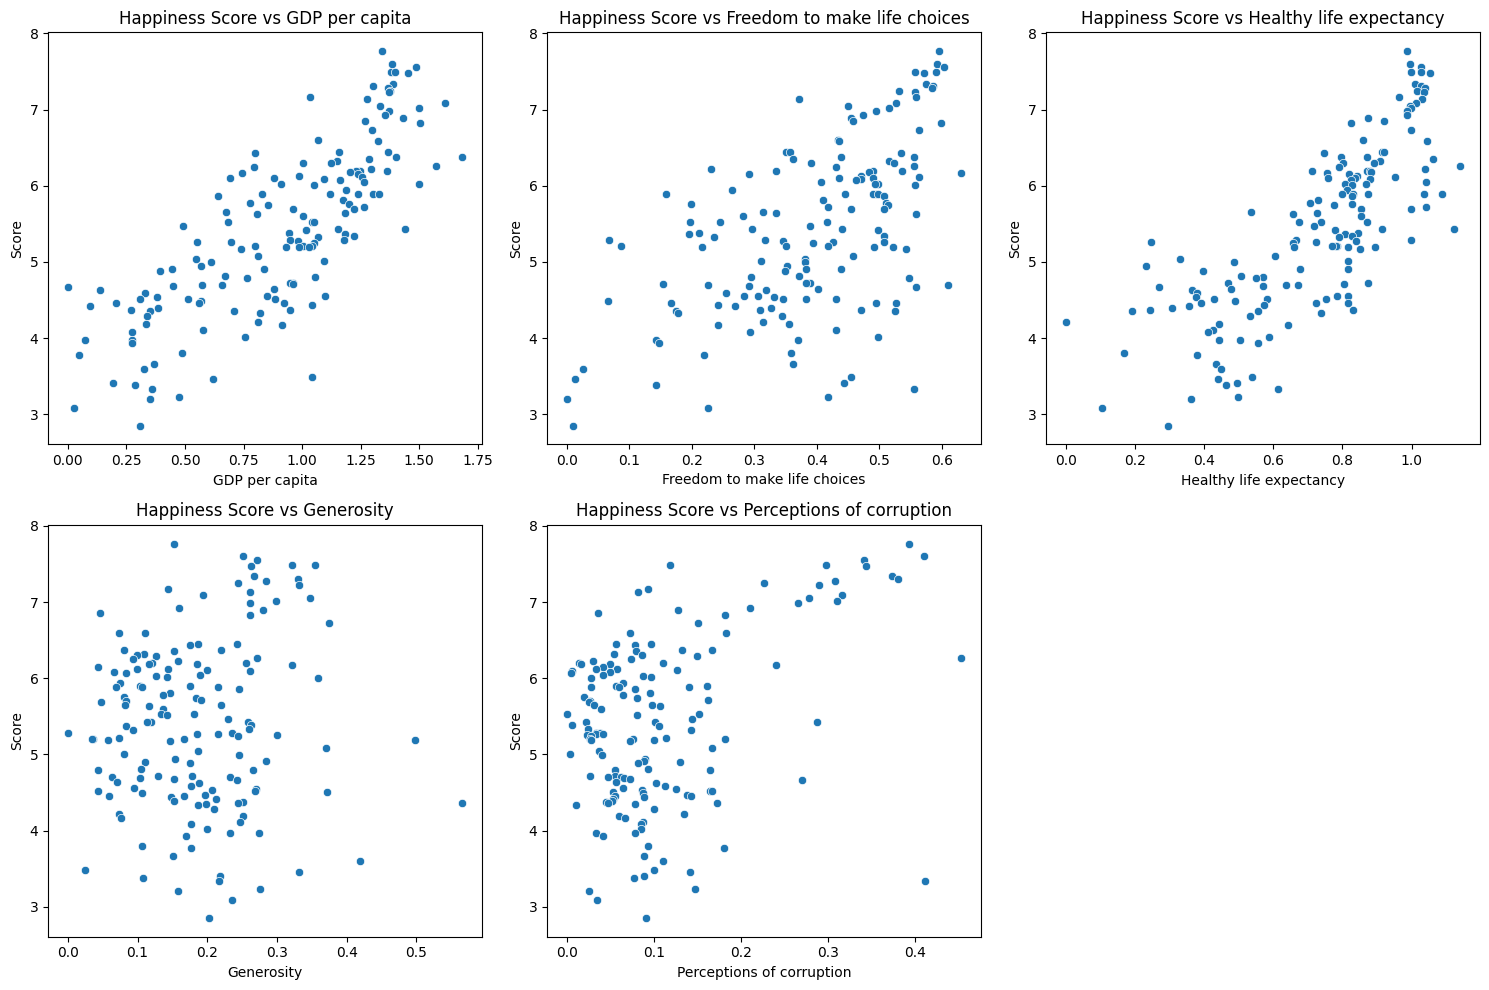

In [19]:
## Creamos una lista de los factores que se podrian relacionar entre si para futuro uso

factors = ['GDP per capita','Freedom to make life choices', 'Healthy life expectancy', 'Generosity','Perceptions of corruption']

## Ajustamos una figura y creamoos subtramas para cada factor contra el puntaje de felicidad

plt.figure(figsize=(15,10)) ## Establecemos el tamaño de la figura

for i,factor in enumerate(factors, 1):
    plt.subplot(2,3,i) ## Creamos un subplot en una figura de 2x3
    sns.scatterplot(x = factor, y = 'Score', data = df_2019) ## Graficando una grafica de puntos
    plt.title(f'Happiness Score vs {factor}') ## Ajustando el titulo

plt.tight_layout() ## Ajustamos el acomodo para evitar que se empalmen
plt.show() ## Mostramos la grafica

#### Como ultimo año que se maneja en neustros datos, revisamos que efectivamente hay una fuerte relación a través de todos los años previos en que factores determinan el puntaje de felicidad

## Apartir de este punto, hemos analizado la relación entre nuestros datos con respecto a como se da el puntaje de felicidad.

## Vamos a proceder a realizar un análisis con respecto al tiempo 


In [20]:
# Renombramos columnas para el  2015
df_2015.rename(columns={'Country': 'Country',
                        'Region': 'Region',
                        'Happiness Rank': 'Happiness Rank 2015',
                        'Happiness Score': 'Happiness Score 2015',
                        'Standard Error': 'Standard Error 2015',
                        'Economy (GDP per Capita)': 'GDP per Capita 2015',
                        'Family': 'Family 2015',
                        'Health (Life Expectancy)': 'Life Expectancy 2015',
                        'Freedom': 'Freedom 2015',
                        'Trust (Government Corruption)': 'Trust Government Corruption 2015',
                        'Generosity': 'Generosity 2015',
                        'Dystopia Residual': 'Dystopia Residual 2015'}, inplace=True)
                        
# Renombramos columnas para el  2016
df_2016.rename(columns={'Country': 'Country',
                        'Region': 'Region',
                        'Happiness Rank': 'Happiness Rank 2016',
                        'Happiness Score': 'Happiness Score 2016',
                        'Lower Confidence Interval': 'Lower Confidence Interval 2016',
                        'Upper Confidence Interval': 'Upper Confidence Interval 2016',
                        'Economy (GDP per Capita)': 'GDP per Capita 2016',
                        'Family': 'Family 2016',
                        'Health (Life Expectancy)': 'Life Expectancy 2016',
                        'Freedom': 'Freedom 2016',
                        'Trust (Government Corruption)': 'Trust Government Corruption 2016',
                        'Generosity': 'Generosity 2016',
                        'Dystopia Residual': 'Dystopia Residual 2016'}, inplace=True)

# Renombramos columnas para el2017
df_2017.rename(columns={'Country': 'Country',
                        'Happiness.Rank': 'Happiness Rank 2017',
                        'Happiness.Score': 'Happiness Score 2017',
                        'Whisker.high': 'Whisker High 2017',
                        'Whisker.low': 'Whisker Low 2017',
                        'Economy..GDP.per.Capita.': 'GDP per Capita 2017',
                        'Family': 'Family 2017',
                        'Health..Life.Expectancy.': 'Life Expectancy 2017',
                        'Freedom': 'Freedom 2017',
                        'Generosity': 'Generosity 2017',
                        'Trust..Government.Corruption.': 'Trust Government Corruption 2017',
                        'Dystopia.Residual': 'Dystopia Residual 2017'}, inplace=True)


# Renombramos columnas para el 2018
df_2018.rename(columns={'Overall rank': 'Happiness Rank 2018',
                        'Country or region': 'Country',
                        'Score': 'Happiness Score 2018',
                        'GDP per capita': 'GDP per Capita 2018',
                        'Social support': 'Family 2018',
                        'Healthy life expectancy': 'Life Expectancy 2018',
                        'Freedom to make life choices': 'Freedom 2018',
                        'Generosity': 'Generosity 2018',
                        'Perceptions of corruption': 'Trust Government Corruption 2018'}, inplace=True)


# Renombramos columnas para elr 2019
df_2019.rename(columns={'Overall rank': 'Happiness Rank 2019',
                        'Country or region': 'Country',
                        'Score': 'Happiness Score 2019',
                        'GDP per capita': 'GDP per Capita 2019',
                        'Social support': 'Family 2019',
                        'Healthy life expectancy': 'Life Expectancy 2019',
                        'Freedom to make life choices': 'Freedom 2019',
                        'Generosity': 'Generosity 2019',
                        'Perceptions of corruption': 'Trust Government Corruption 2019'}, inplace=True)




In [44]:
# Creamos una lista para nuestro nuevo dataframe con todos los años de felicidad
dfs = [df_2015[['Country', 'Happiness Score 2015']],
       df_2016[['Country', 'Happiness Score 2016']],
       df_2017[['Country', 'Happiness Score 2017']],
       df_2018[['Country', 'Happiness Score 2018']],
       df_2019[['Country', 'Happiness Score 2019']]]


all_info_df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019], ignore_index= True)

# Comnimamos todos los dataframes con años de felicidad y por país

combined_df = pd.concat(dfs, ignore_index=True)




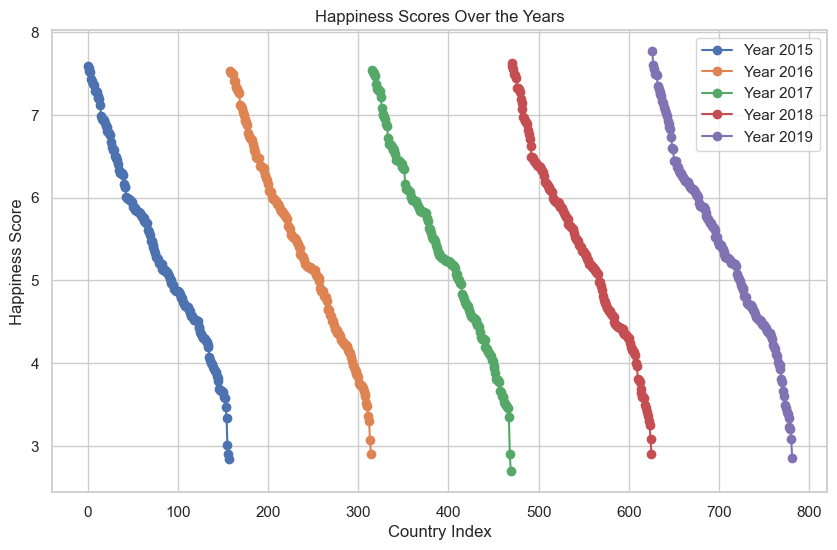

In [22]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Plotting the time series of happiness scores over the years
plt.figure(figsize=(10, 6))
for year in range(2015, 2020):
    plt.plot(combined_df[f'Happiness Score {year}'], label=f'Year {year}', marker='o')

plt.title('Happiness Scores Over the Years')
plt.xlabel('Country Index')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

In [24]:
combined_df

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,7.587,NaN,NaN,NaN,NaN
1,Iceland,7.561,NaN,NaN,NaN,NaN
2,Denmark,7.527,NaN,NaN,NaN,NaN
3,Norway,7.522,NaN,NaN,NaN,NaN
4,Canada,7.427,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
777,Rwanda,NaN,NaN,NaN,NaN,3.334
778,Tanzania,NaN,NaN,NaN,NaN,3.231
779,Afghanistan,NaN,NaN,NaN,NaN,3.203
780,Central African Republic,NaN,NaN,NaN,NaN,3.083


### Procedemos al paso 3. que es identificar los mejores y peores paises en cuestión de puntaje de felicidad

In [27]:
## Lista de años

years = ['2015', '2016', '2017', '2018', '2019']

# Iinicializa dataframes vacios para los más altos y los más bajos

top_performers = pd.DataFrame()
bottom_performers = pd.DataFrame()

# Identificamos los más altos y los más bajos para cada año

for year in years:

    # Identificamos a los paises más altos

    top_df = combined_df[['Country', f'Happiness Score {year}']].nlargest(1, f'Happiness Score {year}')
    top_df['Year'] = year
    top_performers = pd.concat([top_performers, top_df], ignore_index = True)

    # Idenitificamos a los paises más bajos

    bottom_df = combined_df[['Country', f'Happiness Score {year}']].nsmallest(1, f'Happiness Score {year}')
    bottom_df['Year'] = year
    bottom_performers = pd.concat([bottom_performers, bottom_df], ignore_index = True)


In [30]:
# Desplegamos los paises con más puntaje

print("Paises con el puntaje más alto:")
top_performers


Paises con el puntaje más alto:


,Country,Happiness Score 2015,Year,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,7.587,2015,NaN,NaN,NaN,NaN
1,Denmark,NaN,2016,7.526,NaN,NaN,NaN
2,Norway,NaN,2017,NaN,7.537,NaN,NaN
3,Finland,NaN,2018,NaN,NaN,7.632,NaN
4,Finland,NaN,2019,NaN,NaN,NaN,7.769


In [31]:
# Desplegamos los paises con menos puntaje
print("\n Paises con el menor puntaje:")
bottom_performers


 Paises con el menor puntaje:


,Country,Happiness Score 2015,Year,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Togo,2.839,2015,NaN,NaN,NaN,NaN
1,Burundi,NaN,2016,2.905,NaN,NaN,NaN
2,Central African Republic,NaN,2017,NaN,2.693,NaN,NaN
3,Burundi,NaN,2018,NaN,NaN,2.905,NaN
4,South Sudan,NaN,2019,NaN,NaN,NaN,2.853


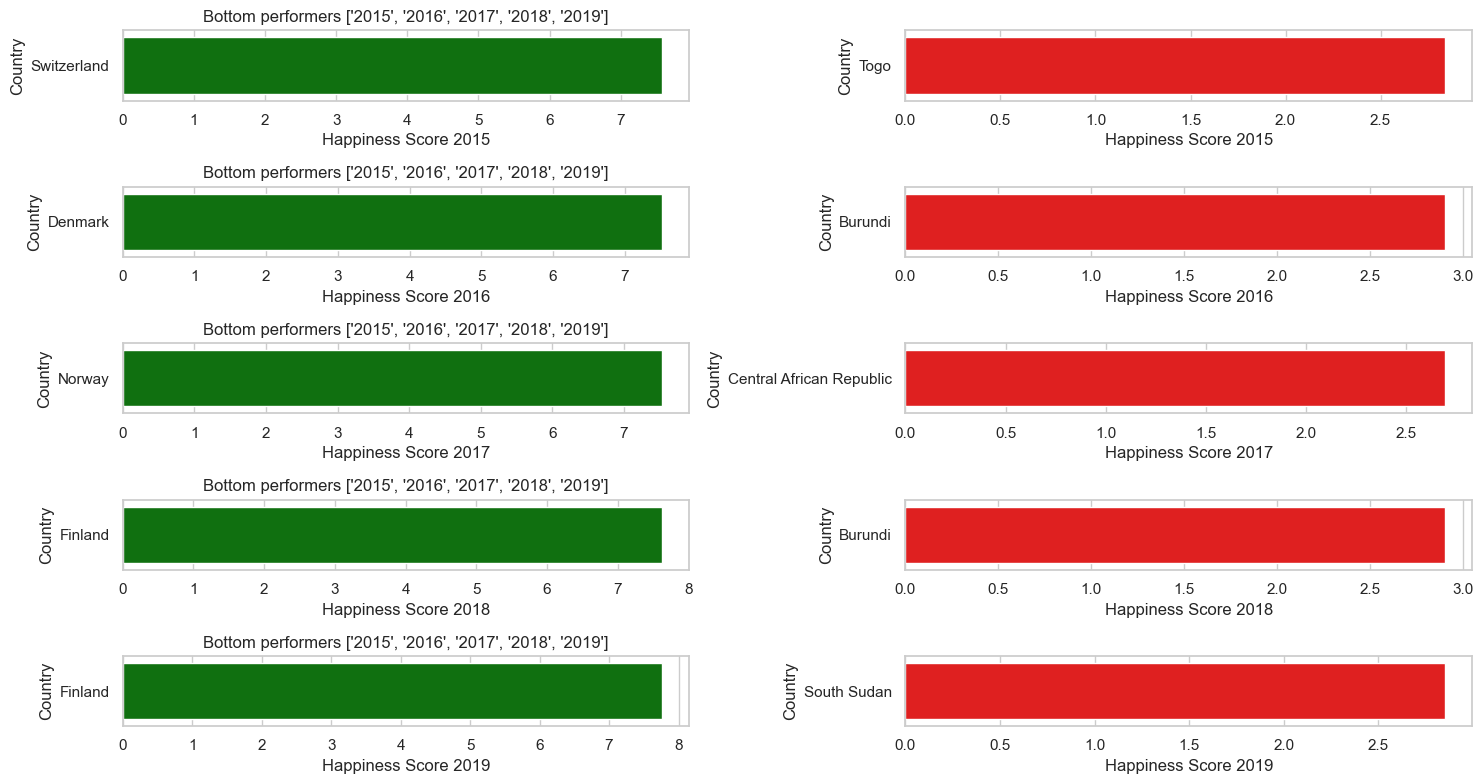

In [41]:
## Para mejor visualización utilizaremos un grafico

# Juntamos todos los datos
all_performers = pd.concat([top_performers, bottom_performers], ignore_index=True)

# Elejimos el estilo de visualización

sns.set(style= "whitegrid")

# Creamos una grafica para cada año

fig, axes = plt.subplots(nrows = len(years), ncols = 2, figsize = (15,8))

for i, year in enumerate(years):
    # Puntajes más altos
    sns.barplot(x= f'Happiness Score {year}', y='Country', data = top_performers[top_performers['Year'] == year], ax = axes[i,0], color='green')
    axes[i,0].set_title(f'Top performers {years}')

    # Puntajes más bajos
    sns.barplot(x= f'Happiness Score {year}', y='Country', data = bottom_performers[bottom_performers['Year'] == year], ax = axes[i,1], color='red')
    axes[i,0].set_title(f'Bottom performers {years}')



# Ajustamos el despliegue

plt.tight_layout()
plt.show()

### Una vez realizado esta investigación de cuales son los mejores y los peores países, seguiremos con el análisis de correlación

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,7.587,NaN,NaN,NaN,NaN
1,Iceland,7.561,NaN,NaN,NaN,NaN
2,Denmark,7.527,NaN,NaN,NaN,NaN
3,Norway,7.522,NaN,NaN,NaN,NaN
4,Canada,7.427,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
777,Rwanda,NaN,NaN,NaN,NaN,3.334
778,Tanzania,NaN,NaN,NaN,NaN,3.231
779,Afghanistan,NaN,NaN,NaN,NaN,3.203
780,Central African Republic,NaN,NaN,NaN,NaN,3.083


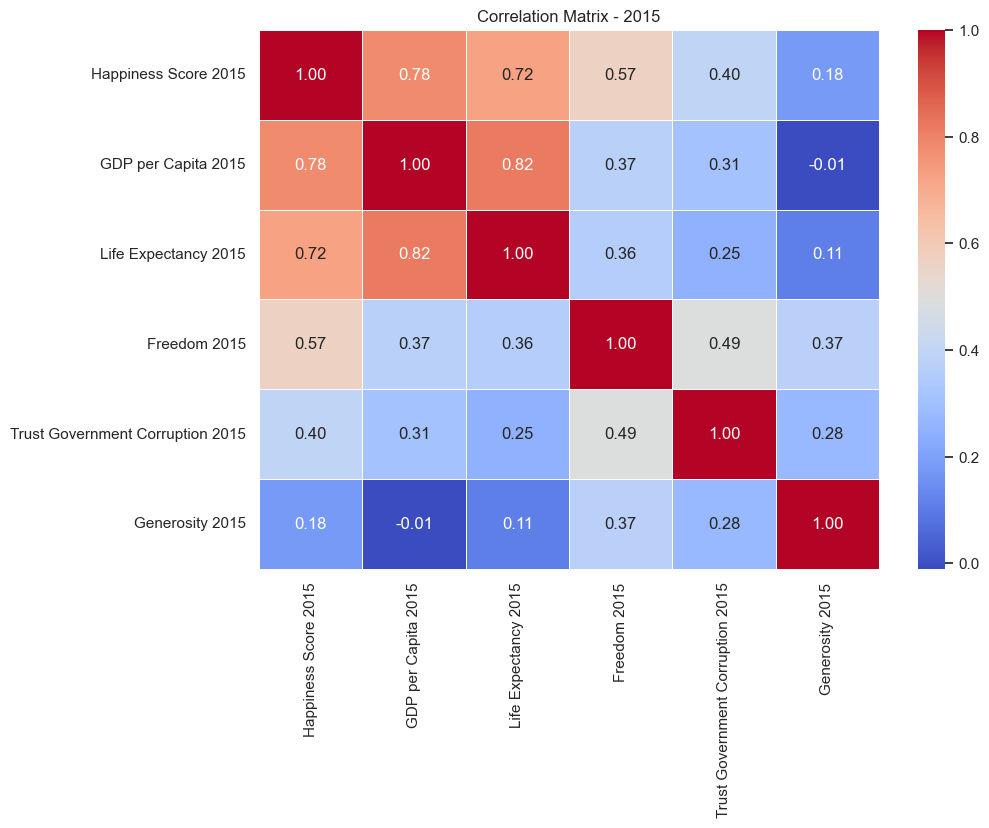

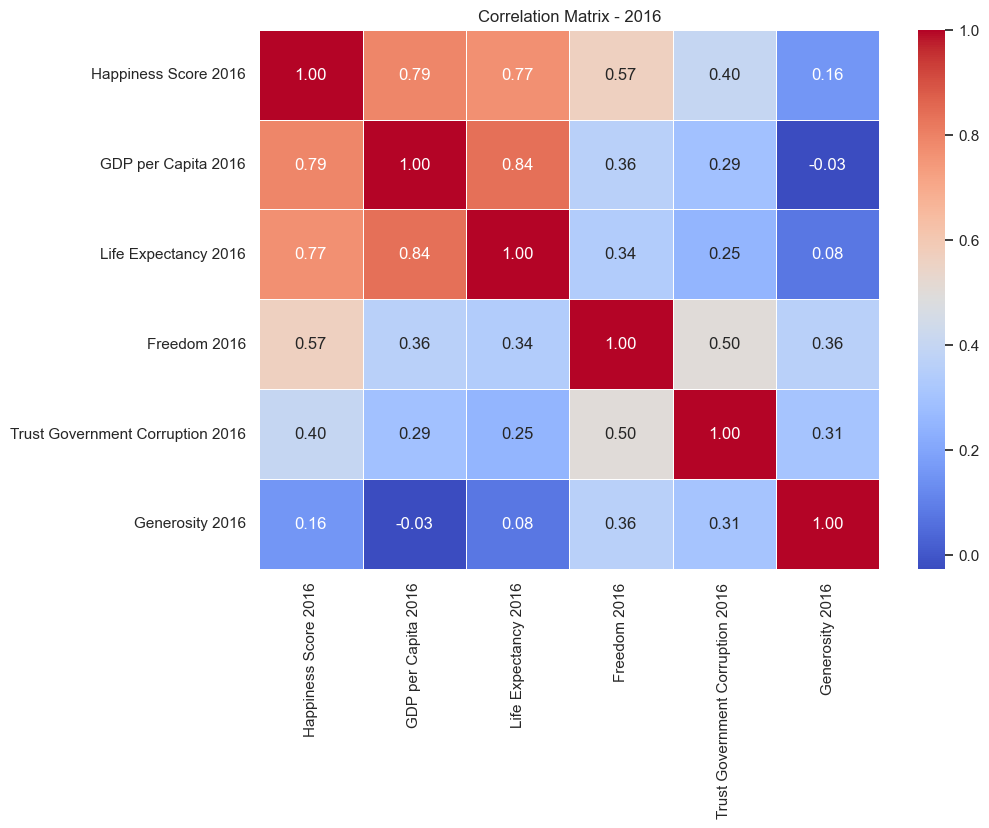

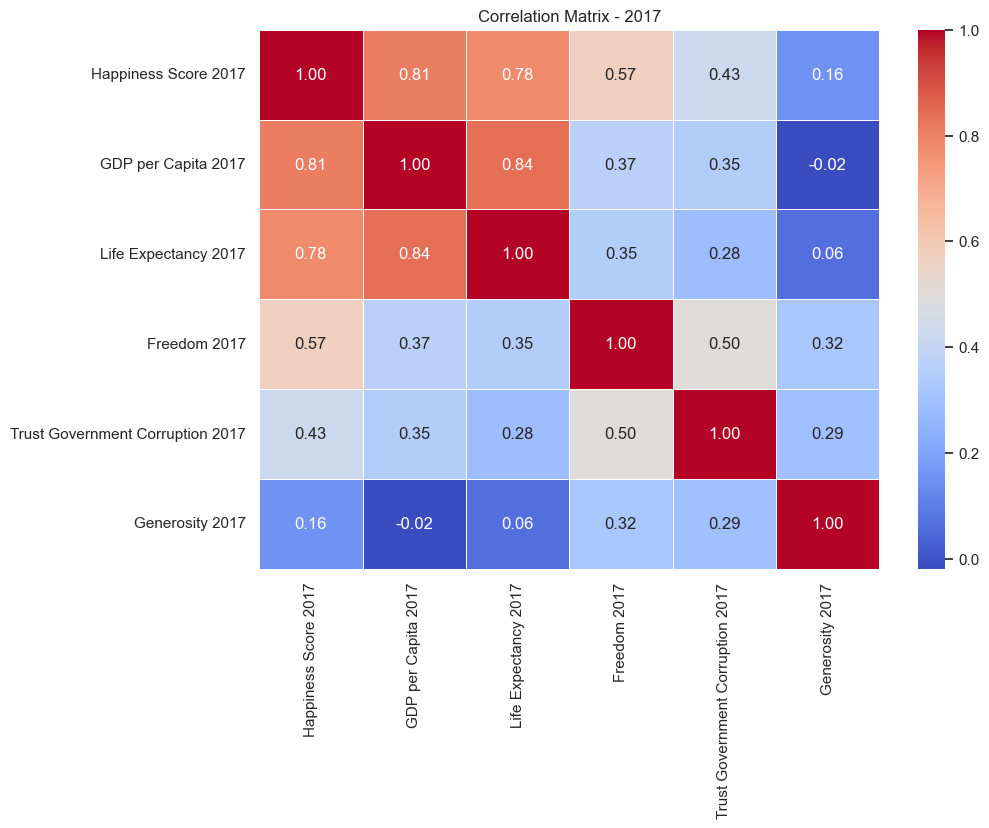

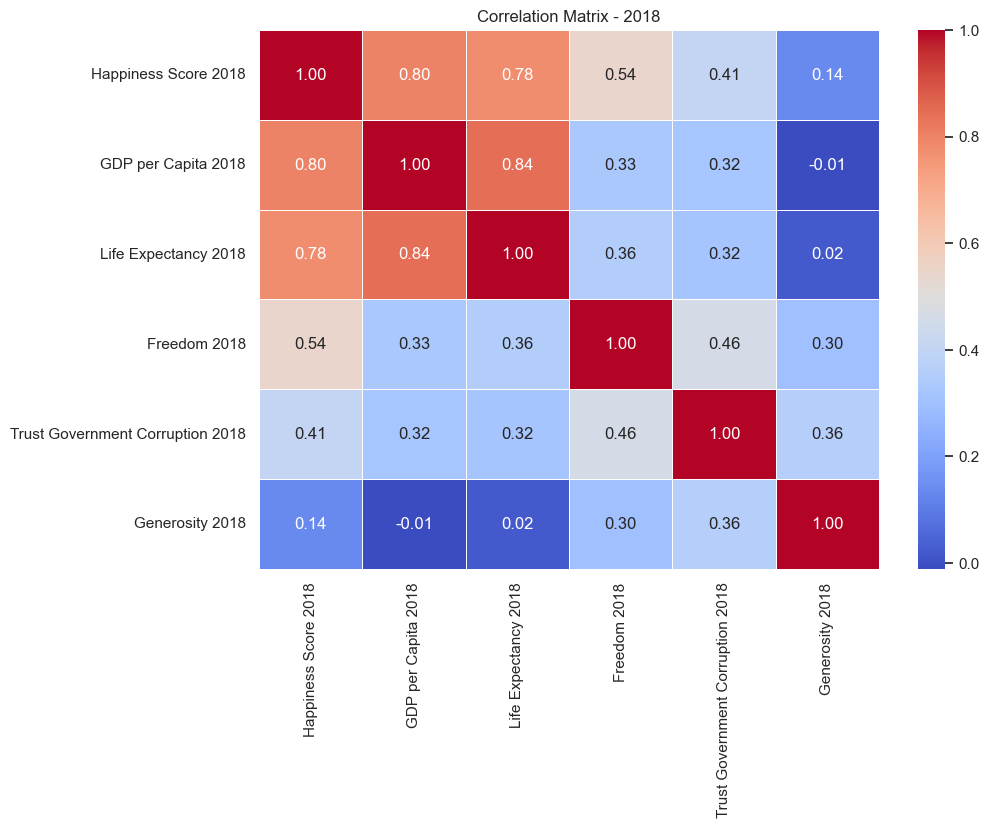

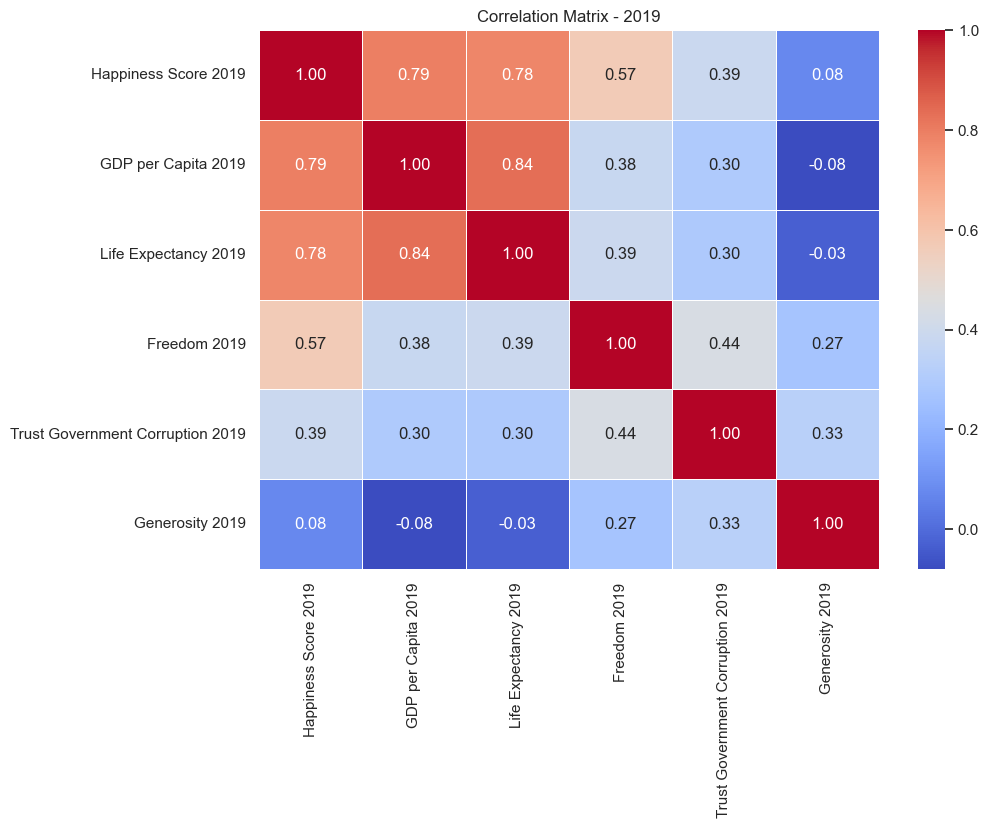

In [47]:
## Creamos un nuevo dataframe para tener las columnas necesarias

correlation_columns = ['Happiness Score', 'GDP per Capita', 'Life Expectancy', 'Freedom', 'Trust Government Corruption', 'Generosity']


correlation_dfs = []

for year, df in zip(years, [df_2015, df_2016, df_2017, df_2018, df_2019]):
    year_columns = [f'{column} {year}' for column in correlation_columns]
    year_df = df[year_columns]
    correlation_dfs.append((year, year_df))

## calculamos la matriz de correlación

for year, correlation_df in correlation_dfs:
    correlation_matrix = correlation_df.corr()
    
    
    ## Visualizamos la matriz de correlación como un mapa de color

    plt.figure(figsize=(10, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix - {year}')
    plt.show()